In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('titanic_data.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
cluster_data = titanic[['Fare', 'Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)

In [8]:
cluster_data.sort_values(by=['Fare', 'Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [10]:
cluster_array

array([[  0.    ,  19.    ],
       [  0.    ,  25.    ],
       [  0.    ,  36.    ],
       ...,
       [512.3292,  35.    ],
       [512.3292,  35.    ],
       [512.3292,  36.    ]])

In [11]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [12]:
import random
random.sample(range(0, len(cluster_array)), 4)

[276, 604, 211, 224]

In [13]:
i_centroid = random.sample(range(0, len(cluster_array)), 4)

In [14]:
i_centroid

[641, 203, 550, 622]

In [15]:
initial_centroids = []
for i in i_centroid:
    initial_centroids.append(cluster_array[i])
initial_centroids

[array([79.2, 60. ]),
 array([ 8.6625, 21.    ]),
 array([39.,  1.]),
 array([73.5, 21. ])]

In [29]:
ic = np.array(initial_centroids)

In [31]:
ic

array([[79.2   , 60.    ],
       [ 8.6625, 21.    ],
       [39.    ,  1.    ],
       [73.5   , 21.    ]])

In [32]:
ic[:, 0]

array([79.2   ,  8.6625, 39.    , 73.5   ])

In [18]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [19]:
centroids = findClosestCentroids(initial_centroids, cluster_array)

In [20]:
centroids

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,


In [26]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

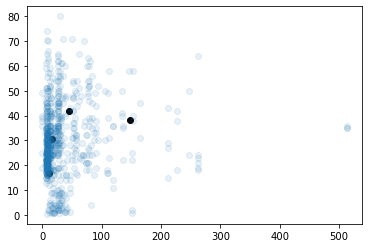

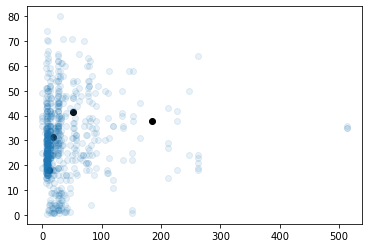

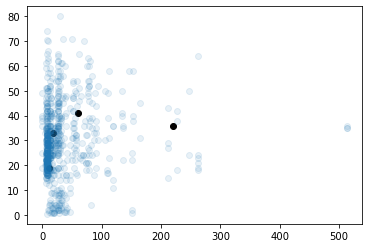

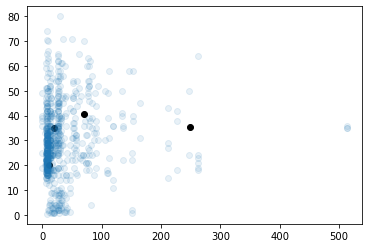

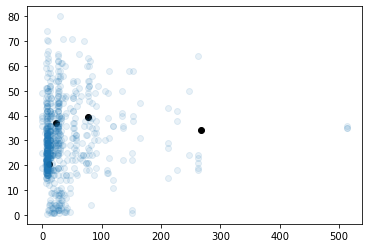

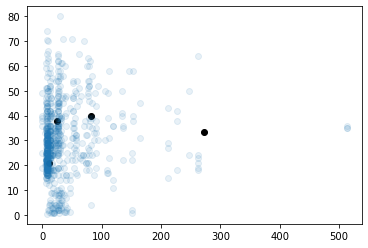

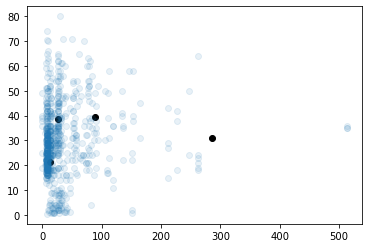

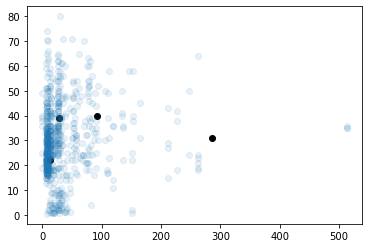

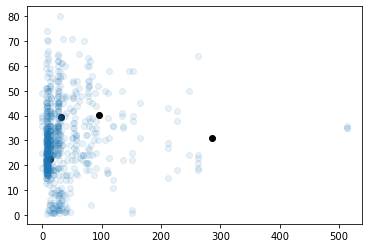

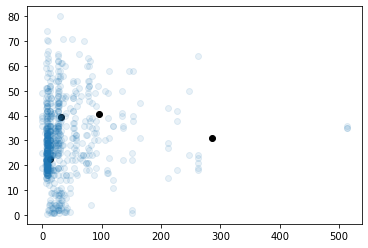

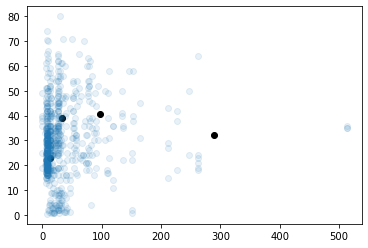

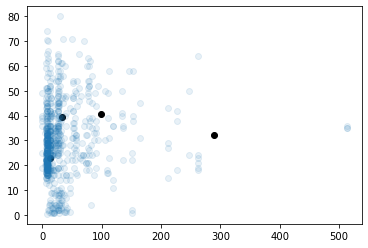

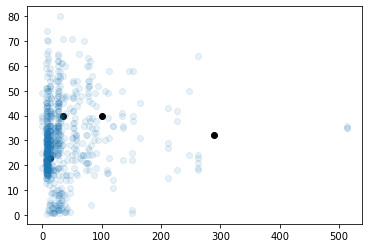

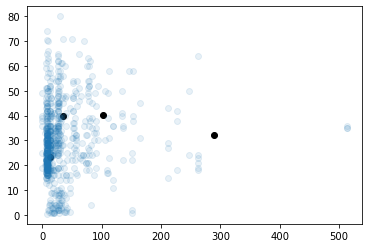

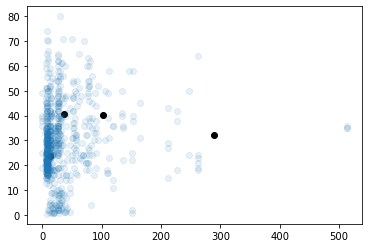

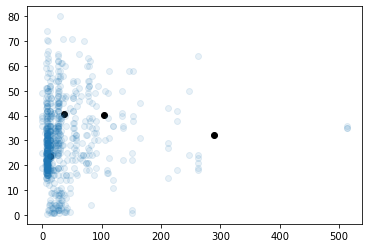

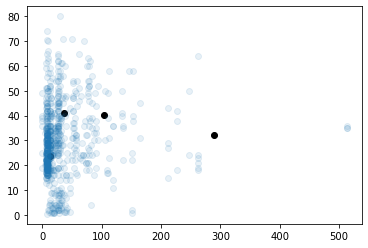

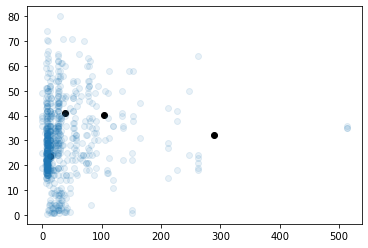

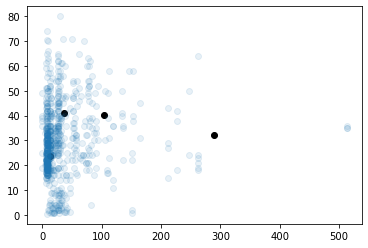

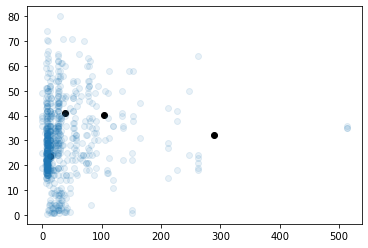

In [44]:
centroids = initial_centroids
for i in range(20):
    get_centroids = findClosestCentroids(centroids, cluster_array)
    centroids = calc_centroids(get_centroids, cluster_array)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(cluster_array[:, 0], cluster_array[:, 1], alpha=0.1)
    plt.show()

#### Andrew Ng's dataset

In [45]:
df1 = pd.read_excel('dataset.xlsx', sheet_name='ex7data2_X', header=None)

In [46]:
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


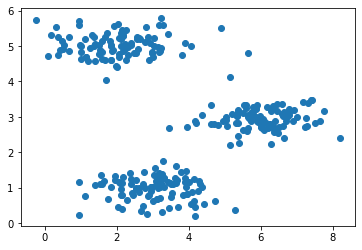

In [49]:
plt.figure()
plt.scatter(df1[0], df1[1])
plt.show()

In [159]:
init_centroids = random.sample(range(0, len(df1)), 3)

In [160]:
init_centroids

[167, 129, 181]

In [161]:
init_centroids = [95, 30, 17]

In [162]:
centroids = []
for i in init_centroids:
    centroids.append(df1.loc[i])
centroids

[0    3.907793
 1    5.094647
 Name: 95, dtype: float64,
 0    2.660466
 1    5.196238
 Name: 30, dtype: float64,
 0    3.007089
 1    4.678978
 Name: 17, dtype: float64]

In [153]:
centroids = np.array(centroids)

In [154]:
X = np.array(df1)

In [155]:
centroids

array([[3.90779317, 5.09464676],
       [2.66046572, 5.19623848],
       [3.00708934, 4.67897758]])

In [156]:
get_centroids = findClosestCentroids(centroids, X)

In [157]:
get_centroids

[2,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


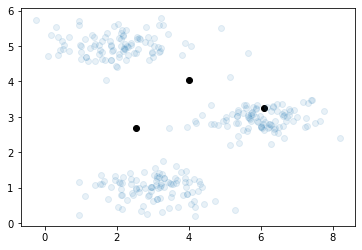

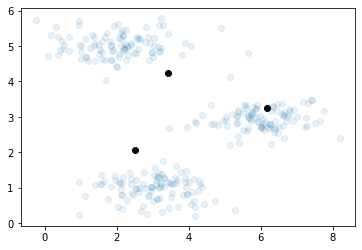

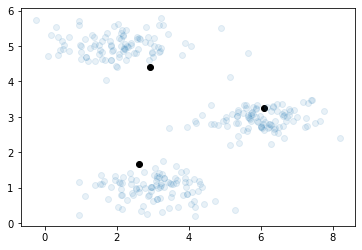

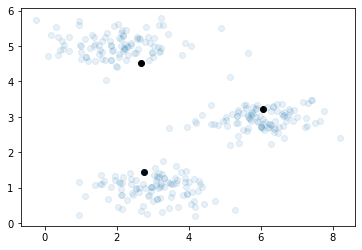

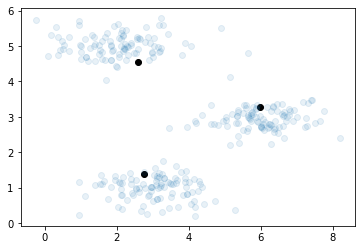

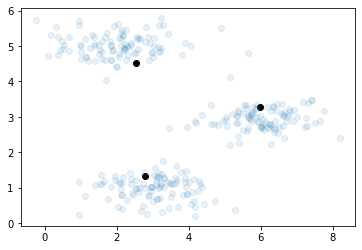

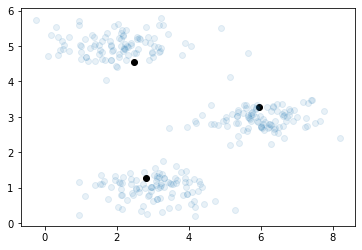

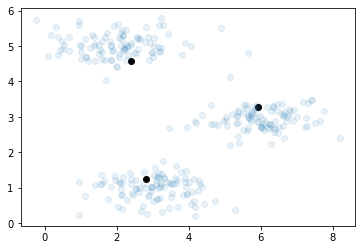

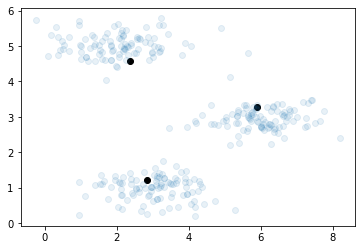

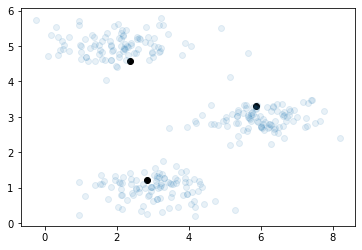

In [91]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

#### Frog Dataset

In [92]:
import cv2 

In [93]:
frog = cv2.imread('frog.png')

In [94]:
frog

array([[[  2,  57,  20],
        [  2,  57,  20],
        [  2,  57,  21],
        ...,
        [  0,   5,   3],
        [  8,  12,  11],
        [ 91,  94,  93]],

       [[  2,  56,  20],
        [  1,  54,  20],
        [  1,  56,  19],
        ...,
        [  0,   2,   1],
        [  7,   9,   8],
        [ 91,  92,  91]],

       [[  2,  55,  20],
        [  2,  53,  19],
        [  1,  54,  18],
        ...,
        [  2,   4,   2],
        [  8,  11,   9],
        [ 91,  93,  91]],

       ...,

       [[  6,  76,  27],
        [  6,  77,  26],
        [  6,  78,  28],
        ...,
        [  6,  55,  18],
        [ 13,  61,  25],
        [ 94, 125, 102]],

       [[  9,  79,  31],
        [ 11,  81,  33],
        [ 12,  82,  32],
        ...,
        [  6,  56,  19],
        [ 14,  61,  27],
        [ 96, 126, 103]],

       [[ 43, 103,  63],
        [ 44, 107,  66],
        [ 46, 106,  66],
        ...,
        [ 37,  81,  50],
        [ 47,  88,  59],
        [118, 145, 126]]

In [95]:
frog = frog/255

In [96]:
frog.shape

(155, 201, 3)

In [103]:
frog = frog.reshape(155*201, 3)

In [104]:
frog

array([[0.00784314, 0.22352941, 0.07843137],
       [0.00784314, 0.22352941, 0.07843137],
       [0.00784314, 0.22352941, 0.08235294],
       ...,
       [0.14509804, 0.31764706, 0.19607843],
       [0.18431373, 0.34509804, 0.23137255],
       [0.4627451 , 0.56862745, 0.49411765]])

In [107]:
random_index = random.sample(range(0, len(frog)), 16)

In [108]:
centroids = []
for i in random_index:
    centroids.append(frog[i])
centroids

[array([0.02352941, 0.25098039, 0.09019608]),
 array([0.03137255, 0.26666667, 0.09019608]),
 array([0.00392157, 0.31372549, 0.11372549]),
 array([0.02745098, 0.34901961, 0.12941176]),
 array([0.03529412, 0.49411765, 0.29803922]),
 array([0.41568627, 0.40392157, 0.29019608]),
 array([0.56078431, 0.50980392, 0.41176471]),
 array([0.05882353, 0.36470588, 0.14509804]),
 array([0.00392157, 0.29803922, 0.1254902 ]),
 array([0.29803922, 0.38431373, 0.4       ]),
 array([0.        , 0.14117647, 0.04313725]),
 array([0.0627451 , 0.50588235, 0.36470588]),
 array([0.00392157, 0.24705882, 0.09019608]),
 array([0.00784314, 0.22352941, 0.0745098 ]),
 array([0.04705882, 0.32941176, 0.22352941]),
 array([0.05098039, 0.12941176, 0.10196078])]

In [110]:
centroids = np.array(centroids)

In [111]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, frog)
    centroids = calc_centroids(get_centroids, frog)    

In [112]:
frog.shape

(31155, 3)

In [113]:
m, n = frog.shape[0], frog.shape[1]

In [114]:
frog_recovered = frog.copy()

In [117]:
frog_recovered

array([[0.00784314, 0.22352941, 0.07843137],
       [0.00784314, 0.22352941, 0.07843137],
       [0.00784314, 0.22352941, 0.08235294],
       ...,
       [0.14509804, 0.31764706, 0.19607843],
       [0.18431373, 0.34509804, 0.23137255],
       [0.4627451 , 0.56862745, 0.49411765]])

In [118]:
get_centroids

[12,
 12,
 12,
 13,
 13,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 7,
 7,
 3,
 0,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 13,
 13,

In [119]:
for i in range(len(frog)):
    frog_recovered[i] = centroids[get_centroids[i]]

In [120]:
frog_recovered

array([[0.01749905, 0.22724141, 0.08330124],
       [0.01749905, 0.22724141, 0.08330124],
       [0.01749905, 0.22724141, 0.08330124],
       ...,
       [0.08923219, 0.33698818, 0.2004014 ],
       [0.11804286, 0.37845412, 0.24258905],
       [0.45420225, 0.61973298, 0.51827275]])

In [121]:
frog_recovered = frog_recovered.reshape(155, 201, 3)

In [122]:
frog1 = cv2.imread('frog.png')

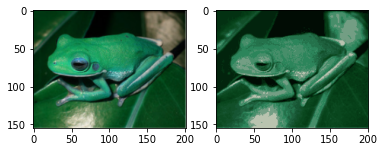

In [124]:
import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(frog1)
ax[1].imshow(frog_recovered)

In [163]:
im  = frog = cv2.imread('frog.png')

In [165]:
im = (im/255).reshape(155*201, 3)

In [166]:
random_index = random.sample(range(0, len(im)), 10)

In [167]:
centroids = []
for i in random_index:
    centroids.append(im[i])
centroids

[array([0.00392157, 0.21176471, 0.06666667]),
 array([0.03529412, 0.2627451 , 0.09803922]),
 array([0.29411765, 0.3254902 , 0.26666667]),
 array([0.00784314, 0.18431373, 0.05882353]),
 array([0.29019608, 0.49411765, 0.28235294]),
 array([0.5254902 , 0.61176471, 0.48627451]),
 array([0.04313725, 0.23921569, 0.09803922]),
 array([0.00392157, 0.23529412, 0.0745098 ]),
 array([0.00392157, 0.20392157, 0.04705882]),
 array([0.22352941, 0.48235294, 0.40784314])]

In [168]:
centroids = np.array(centroids)

In [169]:
centroids

array([[0.00392157, 0.21176471, 0.06666667],
       [0.03529412, 0.2627451 , 0.09803922],
       [0.29411765, 0.3254902 , 0.26666667],
       [0.00784314, 0.18431373, 0.05882353],
       [0.29019608, 0.49411765, 0.28235294],
       [0.5254902 , 0.61176471, 0.48627451],
       [0.04313725, 0.23921569, 0.09803922],
       [0.00392157, 0.23529412, 0.0745098 ],
       [0.00392157, 0.20392157, 0.04705882],
       [0.22352941, 0.48235294, 0.40784314]])

In [171]:
im = np.array(im)

In [172]:
for i in range(20):
    get_centroids = findClosestCentroids(centroids, im)
    centroids = calc_centroids(get_centroids, im)   

In [179]:
centroids

[0    0.017726
 1    0.227360
 2    0.084389
 dtype: float64,
 0    0.119791
 1    0.385882
 2    0.247633
 dtype: float64,
 0    0.155117
 1    0.492051
 2    0.331497
 dtype: float64,
 0    0.006217
 1    0.048596
 2    0.019410
 dtype: float64,
 0    0.258289
 1    0.553290
 2    0.406759
 dtype: float64,
 0    0.728167
 1    0.764610
 2    0.689944
 dtype: float64,
 0    0.073519
 1    0.318513
 2    0.170943
 dtype: float64,
 0    0.035116
 1    0.273665
 2    0.114766
 dtype: float64,
 0    0.010810
 1    0.144621
 2    0.053192
 dtype: float64,
 0    0.444197
 1    0.617780
 2    0.513234
 dtype: float64]

In [173]:
im_recovered = im.copy()

In [180]:
get_centroids

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 7,


In [174]:
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroids[i]]

In [177]:
im_recovered = im_recovered.reshape(155, 201, 3)

In [175]:
im1 = cv2.imread('frog.png')

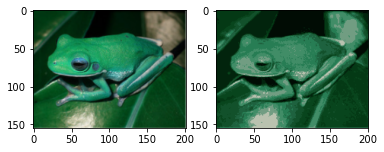

In [178]:
import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)